Importing all essential libraries for the notebook

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
!pip install torchviz --quiet
from torchviz import make_dot
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.datasets import make_regression

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# gneration N data points for creating linear dataset
N = 32 # just 32 thinking it as a minibatch for a while
np.random.seed(42)

actual_w = 3
actual_b = 1.5
error = np.random.rand(N,1)
X = np.random.rand(N, 1)

y = actual_w * X + actual_b + error

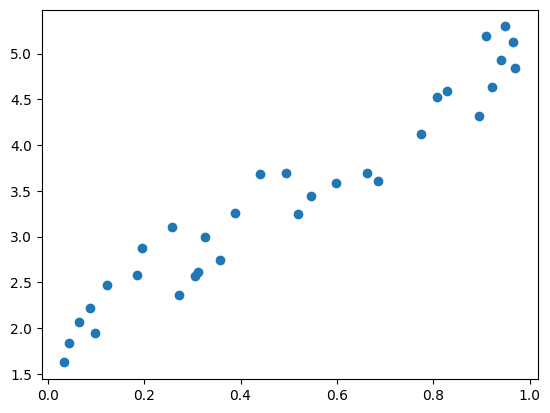

In [4]:
plt.scatter(X, y)

## Creating Linear regression from scratch

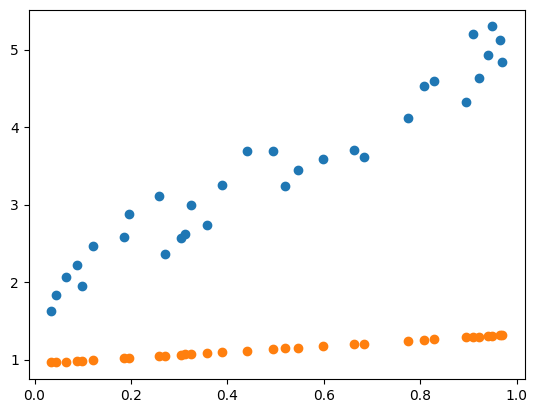

In [5]:

# initialize random w and x. With the help of gradent descent algorith, move our random w and b to actual_w and actual_b so the error would be minimal.

np.random.seed(42)
w = np.random.rand()
b = np.random.rand()

# just comparing the prediction

y_pred = w * X + b

plt.scatter(X,y)
plt.scatter(X, y_pred)


In [6]:
# defining mean squarred error function

def mse(y_pred, y):
  return ((y_pred - y) ** 2).mean()

In [7]:
np.random.seed(42)

w = np.random.rand()
b = np.random.rand()

alpha = 0.1
losses = []

for _ in range(200):

  y_pred = w * X + b

  delta = y_pred - y

  loss = mse(y_pred , y)

  losses.append(loss)

  w_grad = (2 * delta * X).mean()

  b_grad = (2 * delta).mean()

  w -= alpha * w_grad
  b -= alpha * b_grad

w, b

(3.161126694158599, 1.8584073945530828)

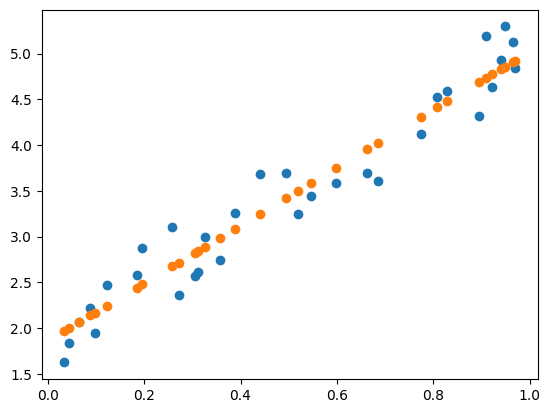

In [8]:
y_pred = w * X + b

plt.scatter(X,y)
plt.scatter(X, y_pred)


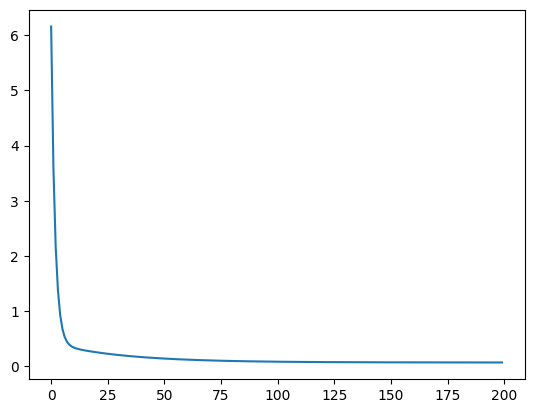

In [9]:
# plotting loss by epochs
plt.plot(range(200), losses)

## Using pytorch workflow

In [10]:
# converting numpy nd array to torch tensor
X = torch.as_tensor(X, dtype=torch.float64)
y = torch.as_tensor(y, dtype=torch.float64)
X.dtype, X.shape

(torch.float64, torch.Size([32, 1]))

## Manually defining w and b instead of using any inbuilt layer from torch

In [11]:
class LinearModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.randn(1, requires_grad=True, device=device))
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, device=device))

  def forward(self, X):
    return self.w * X + self.b

In [12]:
torch.manual_seed(42)

model = LinearModel()

optimizer = optim.SGD(model.parameters(), lr=0.1)

loss_fn = nn.MSELoss()

for _ in range(200):

  model.train()

  y_pred = model(X)

  loss = loss_fn(y_pred, y) # calculates loss using MSE

  loss.backward() # calculates w_grad and b_grad

  optimizer.step() # equivalent to previous w-= w_grad

  optimizer.zero_grad()

model.state_dict()


OrderedDict([('w', tensor([3.1741])), ('b', tensor([1.8514]))])

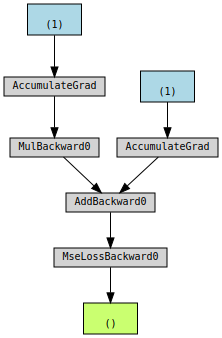

In [13]:
make_dot(loss)

## Using pytorch inbuild layer (nn.Linear) to build our model

In [14]:
class NewLinearModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=1, out_features=1, dtype=torch.float64)
    # self.fc2 = nn.Linear(in_features=6, out_features=1, dtype=torch.float64)


  def forward(self, X):
    # a = self.fc1(X)
    # return self.fc2(a)
    return self.fc1(X)

In [15]:
torch.manual_seed(42)

model = NewLinearModel()

optimizer = optim.SGD(model.parameters(), lr=0.1)

loss_fn = nn.MSELoss()

for _ in range(200):

  model.train()

  y_pred = model(X)

  loss = loss_fn(y_pred, y) # calculates loss using MSE

  loss.backward() # calculates w_grad and b_grad

  optimizer.step() # equivalent to previous w-= w_grad

  optimizer.zero_grad()

model.state_dict()

OrderedDict([('fc1.weight', tensor([[3.1525]], dtype=torch.float64)),
             ('fc1.bias', tensor([1.8631], dtype=torch.float64))])

In [16]:
new_pred = model(X)

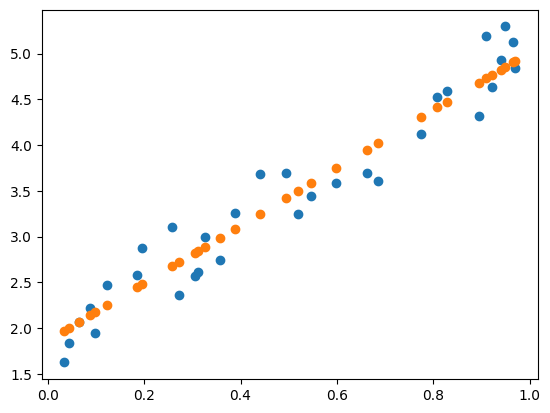

In [17]:
plt.scatter(X, y)
plt.scatter(X, new_pred.detach().numpy())